<a href="https://colab.research.google.com/github/geethaprakash2020/Basic-python-programming/blob/master/Mnist_sequential_study_pranalis_class_24th_jan%2C30th_jan_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><h2><b><font color = 'Blue'> MNIST Case Study </font></b></h2></p>

The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.

The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset.

Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required.

Each image is a 28 by 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. Results are reported using prediction error, which is nothing more than the inverted classification accuracy.

<img src = 'https://dim-mlp-images.s3.amazonaws.com/Deep+Learning/MINST/MNIST.png'>

In [ ]:
%tensorflow_version 2.x
from tensorflow import keras

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
keras.__version__

'2.4.0'

<p><h3><b><font color = 'DarkBlue'> Loading the MNIST dataset in Keras </font></b></h3></p>

The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy
arrays.

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()  # similar xtrain, ytrain

11493376/11490434 [==============================] - 0s 0us/step


<p><b>train_images and train_labels form the training set, the data that the model will learn from. The model will then be tested on the test set, test_images and test_labels.</b></p>

In [ ]:
train_images.shape  # 60000 images each 28 by 28 pixel which would be converted to 28*28=764

(60000, 28, 28)

In [ ]:
train_labels  # target array 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_images[:5,:,:]  # to see 1st five images normal indexing in numpy arrays

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

<p><h3><font color= 'DarkBlue'><b> Visualizing first four samples in Train dataset </b></font></h3></p>

In [ ]:
import matplotlib.pyplot as plt
train_images[0,:,:].shape

(28, 28)

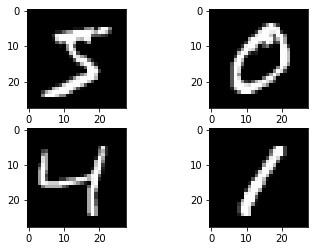

In [ ]:
plt.subplot(2,2,1)
plt.imshow(train_images[0], cmap='gray') 
plt.subplot(2,2,2)    # creating subplots,with 2 rows and 2 columns(2,2) in subplot1 we create 0th image, subplot2 1st image, subplot3 2nd image.
plt.imshow(train_images[1], cmap='gray')
plt.subplot(2,2,3)
plt.imshow(train_images[2], cmap='gray')
plt.subplot(2,2,4)
plt.imshow(train_images[3], cmap='gray');


<p><h3><b><font color = 'DarkBlue'> Preparing the image data ie creating feature matrix</font></b></h3></p>

The training dataset is structured as a 3-dimensional array of instance, image width and image height. For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.

Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. Previously, our training
images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of
shape (60000, 28 * 28) with values between 0 and 1.

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[1,10:20,10:20]  # first image 10:20 row pixels and 10 to 20 column pixels. output is the pixel values

array([[238, 252, 252, 179,  12,  75, 121,  21,   0,   0],
       [253, 233, 208,  84,   0,   0,   0,   0,   0,   0],
       [240,  71,  19,  28,   0,   0,   0,   0,   0,   0],
       [ 63,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7, 135],
       [  0,   0,   0,   0,   0,   0,   0,   7, 131, 252],
       [  0,   0,   0,   0,   0,   0,  48, 165, 252, 173],
       [  0,   0,   0,   0,   0, 114, 238, 253, 162,   0]], dtype=uint8)

https://www.w3schools.com/colors/colors_rgb.asp. Color intensity

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))   # converting 3 dimensional matrix to 2 dimensional matrix 60000 rows and 784 columns
train_images = train_images.astype('float32') / 255   #normalizing 255 is the intensity value of color 0-255 are the values acts as std scaler
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255  #here we do not have color images hence we divide it by 255
 #mandatory data preprocessing step for images

In [ ]:
train_images.ndim

2

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
train_images[1,10:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

<p><h3><b><font color = 'DarkBlue'> Preparing the labels </font></b></h3></p>

The output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix. We use to_categorical() to encode the labels.

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from keras.utils import to_categorical    # Creates dummies as get_dummies here it is t0_categorical methods which would convert train_labels from i dimensional to 2 dimensional
train_labels=to_categorical(train_labels) # where ever true labels are there the value would be 1 else 0
test_labels=to_categorical(test_labels)    #mandatory data preprocessing step for images

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
train_labels.shape

(60000, 10)

<p><h3><b><font color = 'DarkBlue'> Network Architecture </font></b></h3></p>

# ***1. Building a Sequential Model ***
  We can create a deep learning sequential model with two layers. 

In [ ]:
from keras import models
from keras import layers

<p> We are creating a simple model with one hidden layer with 300 number of neurons. A rectifier activation function is used for the neurons in the hidden layer. 
A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction.`

In [ ]:
network = keras.models.Sequential() # creating a instance

NameError: ignored

In [ ]:
network.add(keras.layers.Dense(300, activation='relu', input_shape=(784,)))
# .add is used to add layer.add first layer, dense layer (hidden layer)with 300 neurons, relu as activation function and input shape as 784. number of neurons does not affect the model just there will difference in the calculations

In [ ]:
300*784+300  #300 neurons * 784 features + 300 bias  # number of parameters in the 1st hidden layer

In [ ]:
network.summary()  #summary is a method which will tell us the network architecture, here one layer with 300 neurons and 235500 parameters
#trainable parameters are those which will be updated and calculated during backward and forward pass. nontrainable parameters do not get affected during fit method

 In softmax number of neurons will be equal to number of classes. For binary classification we will have only one neuron and we will use sigmoid as activation function.If its not binary usually it would be soft max.

In [ ]:
network.add(keras.layers.Dense(10, activation='softmax')) # in softmax number of neurons will be equal to number of class
#will add an other output layer. since there are 10 classes we add 10 neurons

In [ ]:
network.summary()  # 2 layers first with 300 neurons and 235500 parameters and 2nd output layer with 10 neurons and 3010 parameters(300*10)+10

In [ ]:
len(network.layers)

In [ ]:
network.layers

In [ ]:
#network.pop()   # to remove last layer from the model use pop()

In [ ]:
weights = network.get_weights()
#will give the weights of both the layers

In [ ]:
type(weights)

In [ ]:
weights[0].shape,weights[1].shape,weights[2].shape,weights[3].shape
# weight 0 is the weight of the hidden layer, shape.weights 1 is the bias for the hidden layer, shape wts2 is the wt of the output layer and weight 3 is the bias for the output layer

In [ ]:
weights[2] 
# randomly initialized weights for each neuron for each layer

In [ ]:
weights[2]

In [ ]:
#keras.backend.clear_session()

<p><h3><b><font color = 'DarkBlue'> Compilation Step</font></b></h3></p>

We will call compile() to specify the loss function. As our targets are one-hot vectors we would use 'categorical_crossentropy' loss function. 

The optimizer we are using is simple Stochastic Gradient Descent 'sgd' which is used to learn the weights. 

As this is a classifier model we use 'accuracy' as the metrics for evaluation. 

In [ ]:
network.compile(optimizer= keras.optimizers.SGD(learning_rate=0.01),
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
network.compile(optimizer= 'SGD',
loss='categorical_crossentropy',
metrics=['accuracy'])

<p><h3><b><font color = 'DarkBlue'> Fit the model with train data  </font></b></h3></p>

We call fit() to train out model.

It takes input features(train_images) and the target classes (train_labels) as well as the number of epochs to train. 

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. 


In [ ]:
60000/512

In [ ]:
test_images.shape,train_images.shape

In [ ]:
history = network.fit(train_images, train_labels,epochs=10,batch_size=512,validation_data=(test_images,test_labels))

In [ ]:
history.validation_data

<p><b>Two quantities are displayed during training: the loss of the network over the training data, and the accuracy of the network over the training data.</b></p>

In [ ]:
y_proba = network.predict(test_images)    # predict() estimates one probablity per class from 0 to 9
y_proba

In [ ]:
y_proba[0:2]

In [ ]:
y_proba.argmax(axis=1)

In [ ]:
test_images.shape

In [ ]:
test_1 = test_images[0,:]

In [ ]:
test_1 = test_1.reshape([28,28])

In [ ]:
plt.imshow(test_1,cmap='gray')

In [ ]:
y_pred = network.predict_classes(test_images)   # predict_classes() outputs the class with highest estimated probability
y_pred

In [ ]:
import numpy as np

In [ ]:
test_labels[0]

In [ ]:
y_actual = np.argmax(test_labels,axis=1)

In [ ]:
y_actual

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_actual,y_pred)

<p><h3><b><font color = 'DarkBlue'> Evaluate the model  </font></b></h3></p>

check the performance of model on test data.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

In [ ]:
print('test_acc:', test_acc)
print('test_loss :', test_loss)

#plot accuracy And Loss graph

In [ ]:
plt.figure()
plt.plot(history.history['loss'], '-g')
plt.plot(history.history['val_loss'], '-b')
plt.legend(['Train','Validation'])
plt.title('Train Loss vs Validation Loss')
plt.figure()
plt.plot(history.history['accuracy'], '-g')
plt.plot(history.history['val_accuracy'], '-b')
plt.legend(['Train','Validation'])
plt.title('Train Accuracy vs Validation Accuracy')


In [ ]:
train_X=train_images